In [1]:
import sys
from pathlib import Path

# Add project root to Python path
project_root = Path.cwd().parent
sys.path.append(str(project_root))



In [2]:
from src.queue import MM1Queue
from src.analysis import *

import matplotlib.pyplot as plt



In [3]:
lambda_rate = 0.8
mu_rate = 1.0
T = 100_000

queue = MM1Queue(lambda_rate, mu_rate, seed=42)
states, times = queue.simulate(T)


In [4]:
burn_in_fraction = 0.2
cum_times = np.cumsum(times)
total_time = cum_times[-1]
burn_in_time = burn_in_fraction * total_time

# find index where burn-in ends
burn_idx = np.searchsorted(cum_times, burn_in_time)
states_ss = states[burn_idx:]
times_ss = times[burn_idx:]


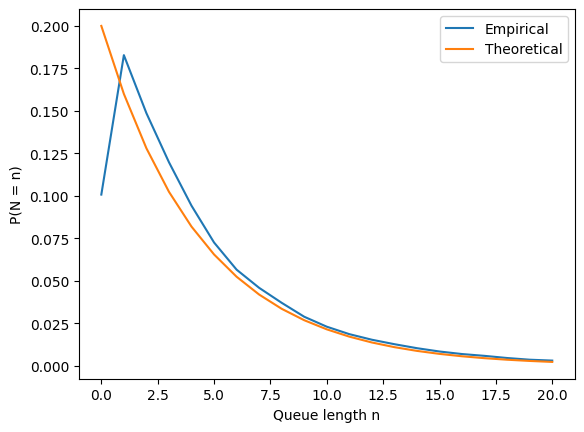

In [5]:
rho = lambda_rate / mu_rate
max_state = 20

emp = empirical_stationary_distribution(states_ss, max_state)
theory = theoretical_stationary_distribution(rho, max_state)

plt.figure()
plt.plot(emp, label="Empirical")
plt.plot(theory, label="Theoretical")
plt.xlabel("Queue length n")
plt.ylabel("P(N = n)")
plt.legend()
plt.show()


In [6]:
E_N_emp = time_average_queue_length(states_ss, times_ss)
E_N_theory = rho / (1 - rho)

print("Empirical E[N]:", E_N_emp)
print("Theoretical E[N]:", E_N_theory)



Empirical E[N]: 4.048388695310244
Theoretical E[N]: 4.000000000000001
